# Deep Deterministic Policy Gradients (DDPG)
---
In this notebook, we train DDPG with OpenAI Gym's Pendulum-v0 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

### 2. Instantiate the Environment and Agent

In [2]:
env = gym.make('Pendulum-v0')
env.seed(2)
agent = Agent(state_size=3, action_size=1, random_seed=2)

/home/dc8291/miniconda3/envs/Capstone/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


### 3. Train the Agent with DDPG

/home/dc8291/miniconda3/envs/Capstone/lib/python3.7/site-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Score: -1289.34
Episode 200	Average Score: -683.590
Episode 300	Average Score: -449.09
Episode 400	Average Score: -453.08
Episode 500	Average Score: -376.46
Episode 600	Average Score: -460.51
Episode 700	Average Score: -587.87
Episode 800	Average Score: -666.28
Episode 900	Average Score: -533.45
Episode 1000	Average Score: -527.40


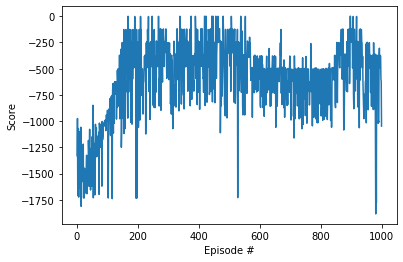

In [4]:
def ddpg(n_episodes=1, max_t=50, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
    return scores

scores, states,  = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Generating Random Samples

### Run jupyter notebook through this command to make display work

xvfb-run -a jupyter notebook --no-browser

KeyboardInterrupt: 

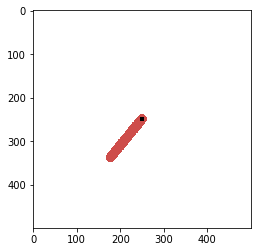

In [6]:
from IPython import display

# agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
# agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

state = env.reset()
rewards = []
states = []
num_data = 10000
print_num = num_data / 10
img = plt.imshow(env.render(mode='rgb_array'))
random_action = env.action_space.sample()
state, reward, done, _ = env.step(random_action)
rewards.append(reward)
states.append(state)
for t in range(num_data - 1):
    
    img.set_data(env.render(mode='rgb_array'))
    display.display(plt.gcf())
    display.clear_output(wait=True)

#     action = agent.act(state, add_noise=False)
    state, reward, done, _ = env.step([0])
    rewards.append(reward)
    states.append(state)
    if t % print_num == 0:
        print(t)

env.close()

In [43]:
ub = num_data*0.05
times = np.linspace(0,ub, num_data)
states = np.vstack(states)
theta = [x for x in states[:, 1]]

In [ ]:
np.savez('./data/pendulum_data', theta=theta, times=times)

In [12]:
len(theta)

1000

In [32]:
theta

[0.7936661033689286,
 0.7458418939360492,
 0.6734121831277229,
 0.573341746175647,
 0.44470282049965215,
 0.29019419857064754,
 0.11686712657352193,
 -0.06449787353611913,
 -0.24139342504757566,
 -0.4022819709922011,
 -0.5388985632019679,
 -0.6473033761223821,
 -0.7275058839058315,
 -0.7821049602149782,
 -0.814614740368819,
 -0.828007374650756,
 -0.8237388753541517,
 -0.8013291374245977,
 -0.758496805164476,
 -0.6918508977636963,
 -0.5981181969639034,
 -0.47575576954551324,
 -0.3265530419438452,
 -0.15659280821906318,
 0.02404439188082816,
 0.20301073214024132,
 0.3683222900795329,
 0.5108418808200538,
 0.6256521589361259,
 0.7119763638641373,
 0.7719805528095184,
 0.8091147876325968,
 0.8265753553997603,
 0.8262120010715763,
 0.807983697296926,
 0.7699701343461799,
 0.7089391142874447,
 0.6214609660543876,
 0.5054596719877633,
 0.3618656334144938,
 0.19577940429747046,
 0.016493492657917802,
 -0.16393883606820145,
 -0.33321455457428345,
 -0.4813937249230453,
 -0.602576018104687,
 -0.6

In [ ]:
states = np.vstack(states)
theta = [np.arcsin(x) for x in states[:, 1]]
plt.figure(figsize=(20,7))
plt.plot(theta[:1000])
plt.savefig("./data/pendulum_data_arcsin")

### 4. Watch a Smart Agent!

In [41]:
from IPython import display

agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

state = env.reset()

img = plt.imshow(env.render(mode='rgb_array'))
for t in range(200):
    img.set_data(env.render(mode='rgb_array'))
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = agent.act(state, add_noise=False)
    state, reward, done, _ = env.step(action)

env.close()

NameError: name 'base' is not defined

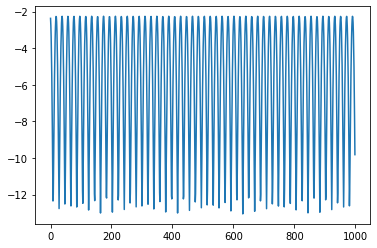

In [40]:
plt.plot(rewards)

### 6. Explore

In this exercise, we have provided a sample DDPG agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster than this benchmark implementation.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task!
- Write your own DDPG implementation.  Use this code as reference only when needed -- try as much as you can to write your own algorithm from scratch.
- You may also like to implement prioritized experience replay, to see if it speeds learning.  
- The current implementation adds Ornsetein-Uhlenbeck noise to the action space.  However, it has [been shown](https://blog.openai.com/better-exploration-with-parameter-noise/) that adding noise to the parameters of the neural network policy can improve performance.  Make this change to the code, to verify it for yourself!
- Write a blog post explaining the intuition behind the DDPG algorithm and demonstrating how to use it to solve an RL environment of your choosing.  